## 1. Understanding the business

In this case, it is quite simple. This type of task will be helpful for non-profit organizations that rely on donations. Accurately determining the income of a potential donor is quite important to understand whether it is worth contacting such a person at all, and what kind of help to ask for. Thus, our goal is to build a model that will predict whether a person earns more than `$50k.

## 2. Data Working

**Features**
- `age`: Age
- `workclass`: Working Class (Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked)
- `education_level`: Level of Education (Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool)
- `education-num`: Number of educational years completed
- `marital-status`: Marital status (Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse)
- `occupation`: Work Occupation (Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces)
- `relationship`: Relationship Status (Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried)
- `race`: Race (White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black)
- `sex`: Sex (Female, Male)
- `capital-gain`: Monetary Capital Gains
- `capital-loss`: Monetary Capital Losses
- `hours-per-week`: Average Hours Per Week Worked
- `native-country`: Native Country (United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands)

**Target Variable**
- `income`: Income Class (<=50K, >50K)

### 2.1 Imports

In [446]:
# basic imports
import pandas as pd
import numpy as np

# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns

# feature eng
import featuretools as ft

### 2.2 Notebook settings

In [447]:
### All rows and columns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

# SNS Options

sns.set_theme(style="darkgrid", palette="Dark2")


### 2.3 Dataset Import

In [448]:
df = pd.read_csv('data\census.csv')

## 3. Understanding the data

In [449]:
df.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [450]:
df.shape

(45222, 14)

In [451]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              45222 non-null  int64  
 1   workclass        45222 non-null  object 
 2   education_level  45222 non-null  object 
 3   education-num    45222 non-null  float64
 4   marital-status   45222 non-null  object 
 5   occupation       45222 non-null  object 
 6   relationship     45222 non-null  object 
 7   race             45222 non-null  object 
 8   sex              45222 non-null  object 
 9   capital-gain     45222 non-null  float64
 10  capital-loss     45222 non-null  float64
 11  hours-per-week   45222 non-null  float64
 12  native-country   45222 non-null  object 
 13  income           45222 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


In [452]:
df.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [453]:
no_of_records = df.shape[0]
print(f'Number of records: {no_of_records}')

no_of_greater_50k = df[df['income'] == '>50K'].shape[0]
print(f'Number of records greater than 50K: {no_of_greater_50k}.')
greater_perc = round((no_of_greater_50k / no_of_records) * 100, 2)
print(f'Percentage of >50K class {greater_perc} %')

no_of_less_50k = df[df['income'] == '<=50K'].shape[0]
print(f'Number of records less than 50K: {no_of_less_50k}')
less_perc = round((no_of_less_50k / no_of_records) * 100, 2)
print(f'Percentage of <=50K class {less_perc} %')

Number of records: 45222
Number of records greater than 50K: 11208.
Percentage of >50K class 24.78 %
Number of records less than 50K: 34014
Percentage of <=50K class 75.22 %


Our target class are inbalanced that why we need to use over sampling algorytm like RandomOverSampling, SMOTE, ADASYN

In [454]:
def distrubutions_charts(dataframe) :
    """ Function that show distrubution charts for numeric columns

        Args:
            dataframe -> set with data
    """
    num_col = dataframe.select_dtypes(include= 'number').columns.to_list()
    for col in num_col :
        plt.figure(figsize=(17,6))
        sns.countplot(data=dataframe, x=col)
        plt.title(str.capitalize(col))
        plt.xticks(rotation=90)
        plt.show()

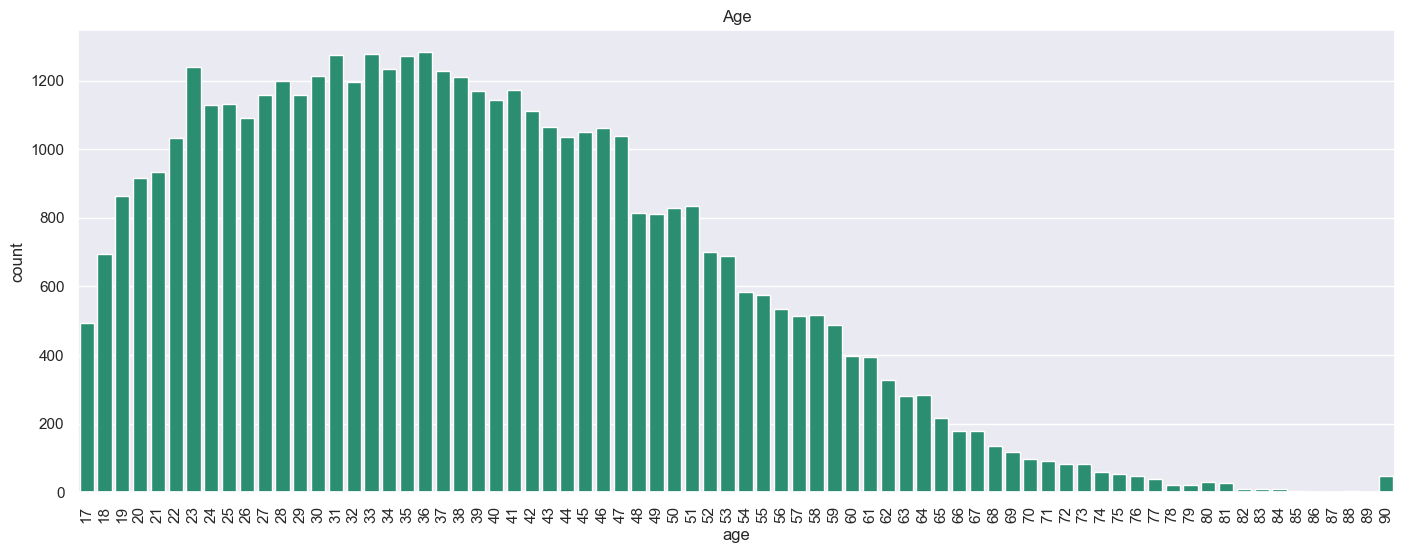

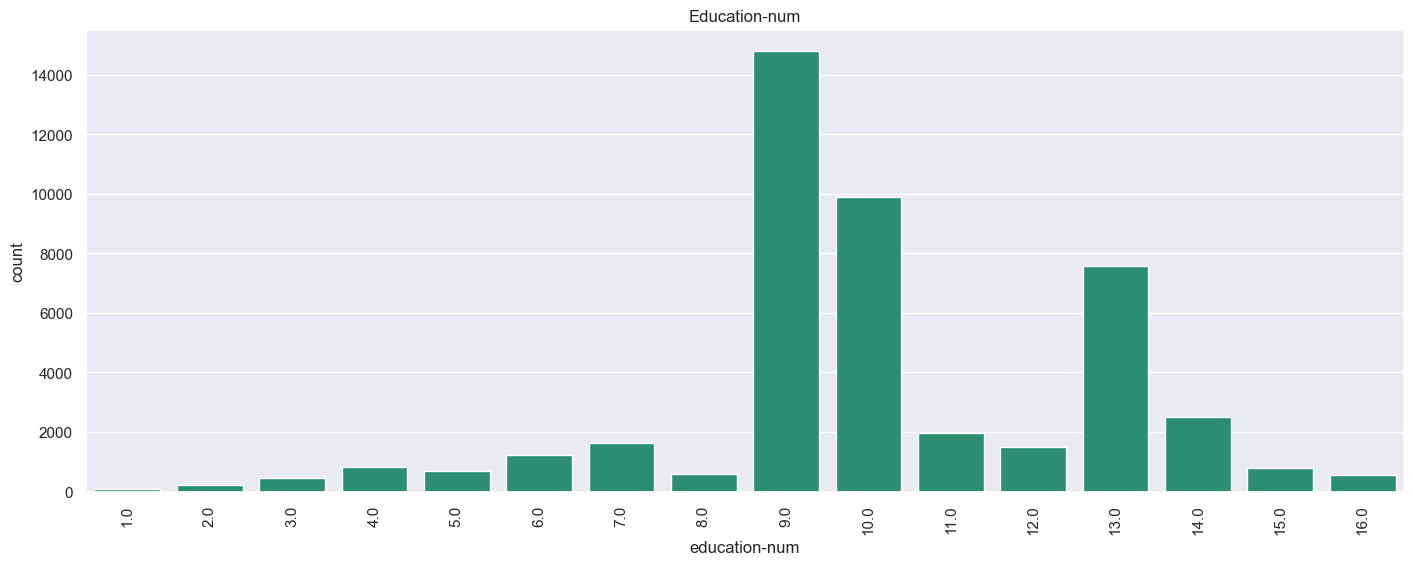

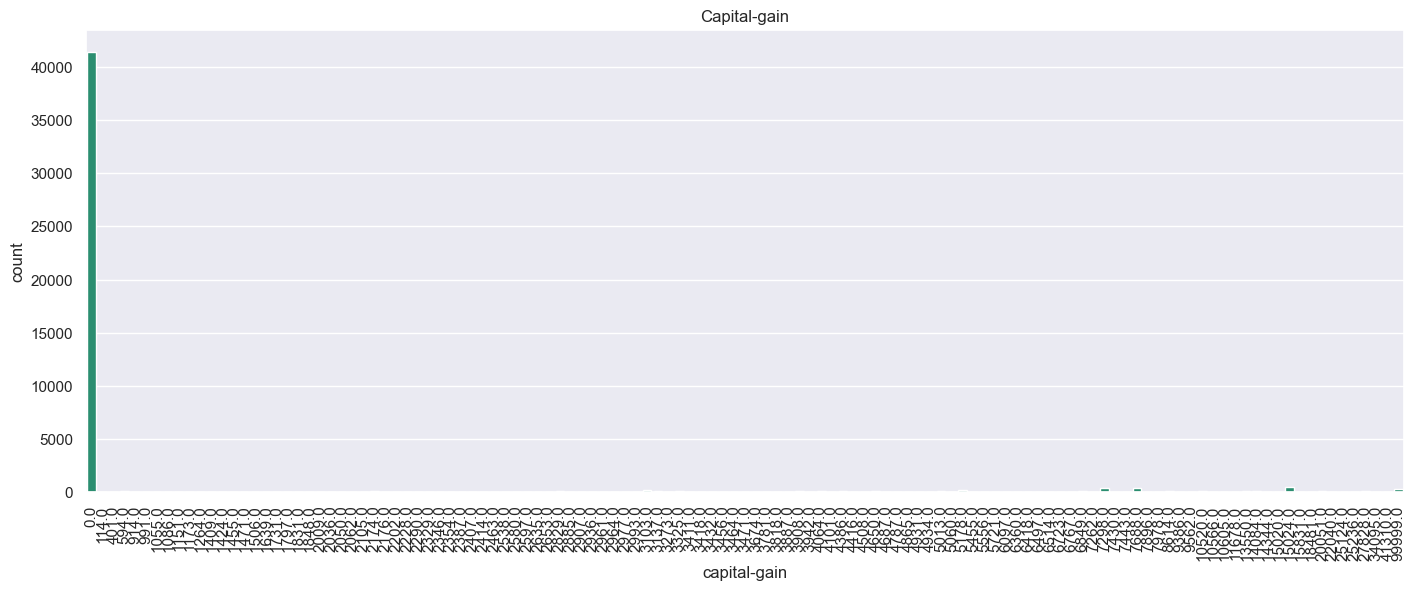

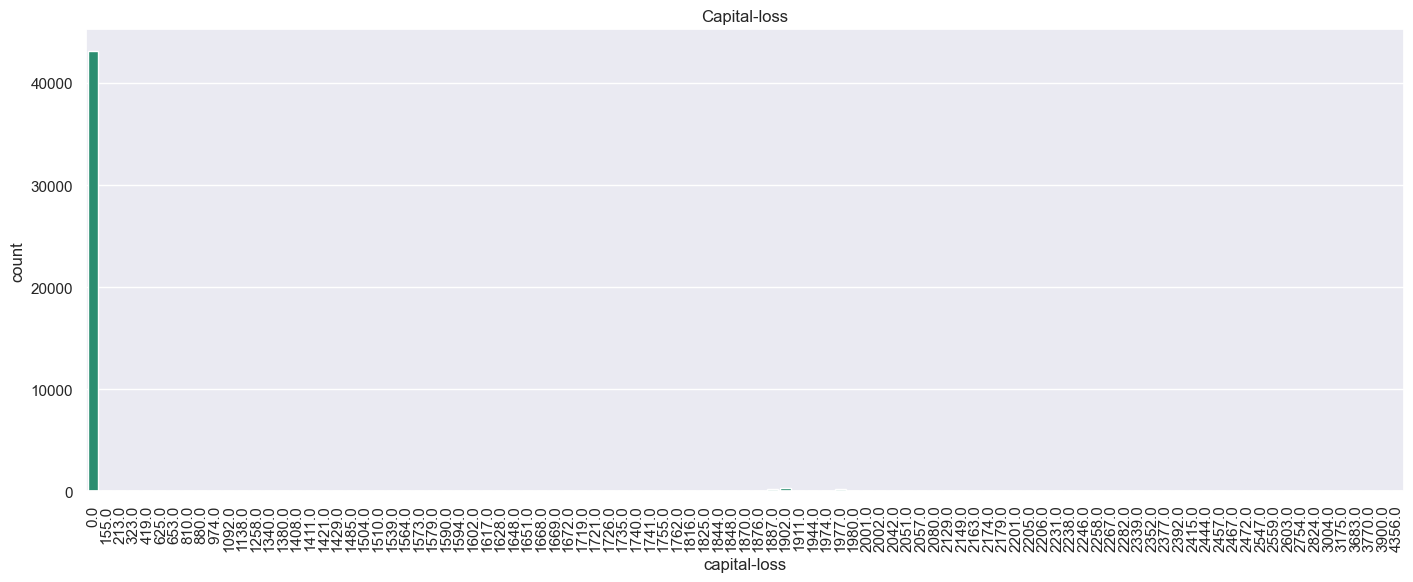

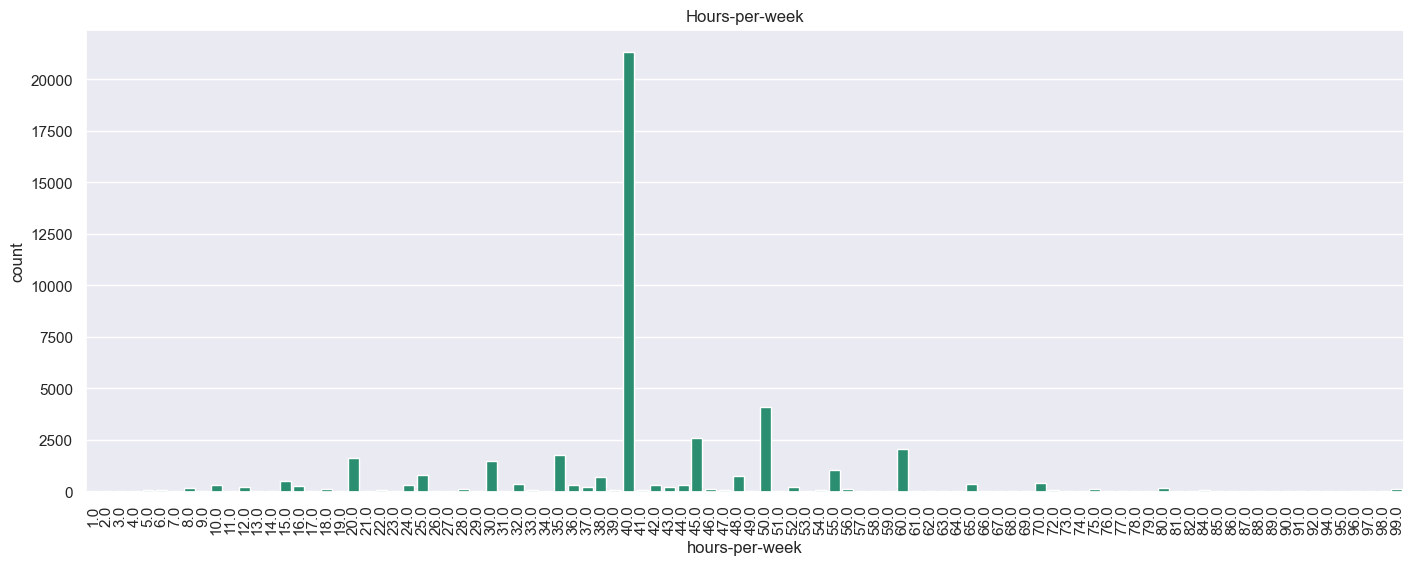

In [455]:
distrubutions_charts(df)

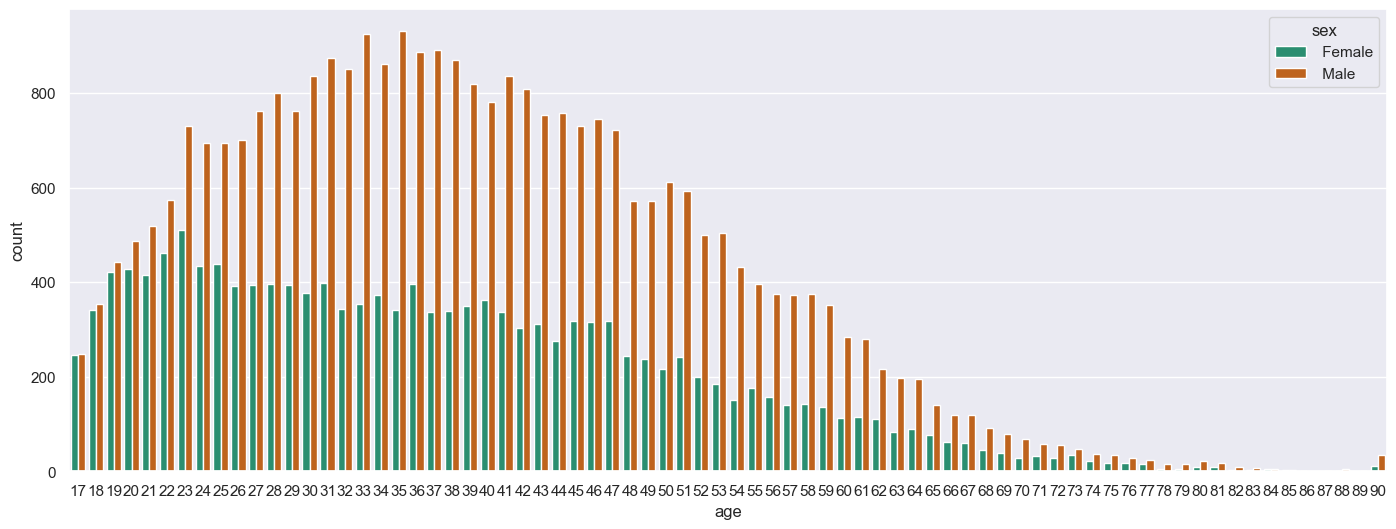

In [456]:
# Age distrubution
plt.figure(figsize=(17,6))
sns.countplot(data= df, x = 'age', hue = 'sex')
plt.show()

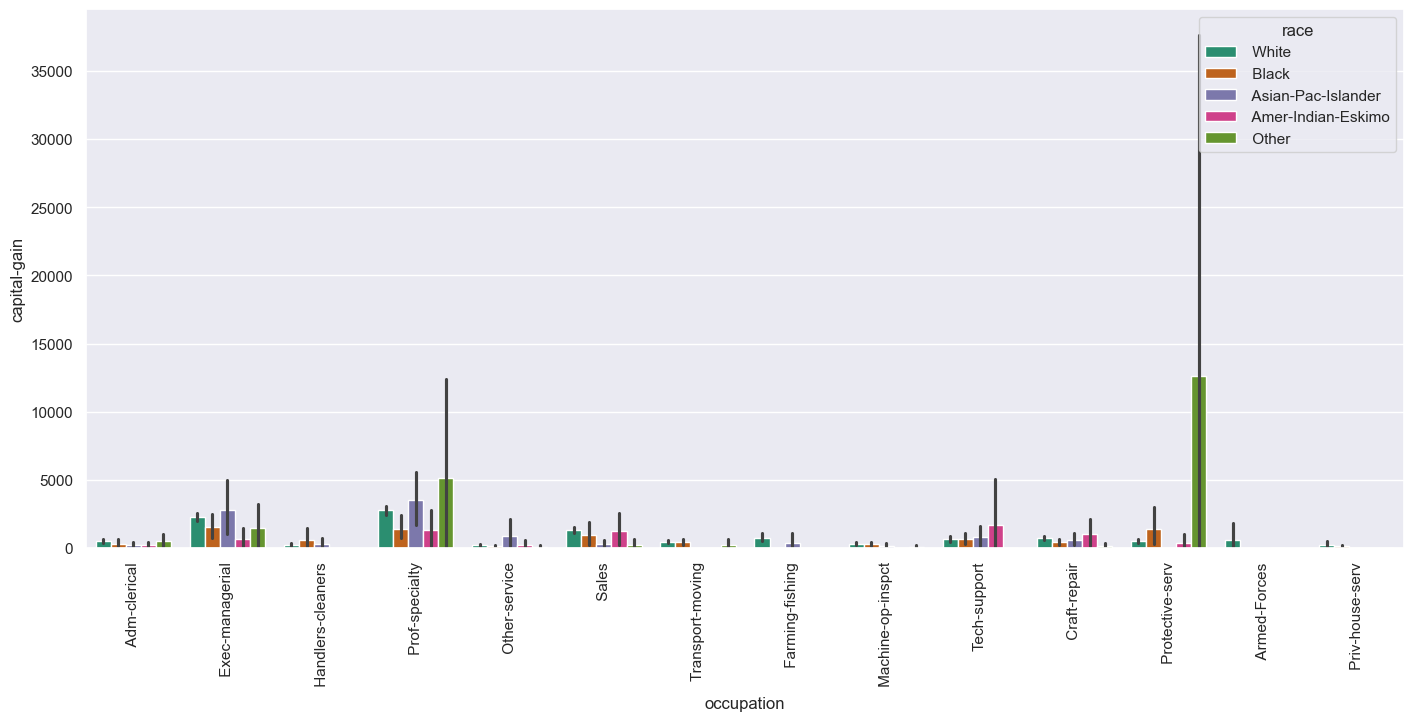

In [457]:
# Capitan-Gain Distribution
plt.figure(figsize=(17,7))
sns.barplot(x='occupation', y="capital-gain", hue='race', data=df)
plt.xticks(rotation=90)
plt.show()

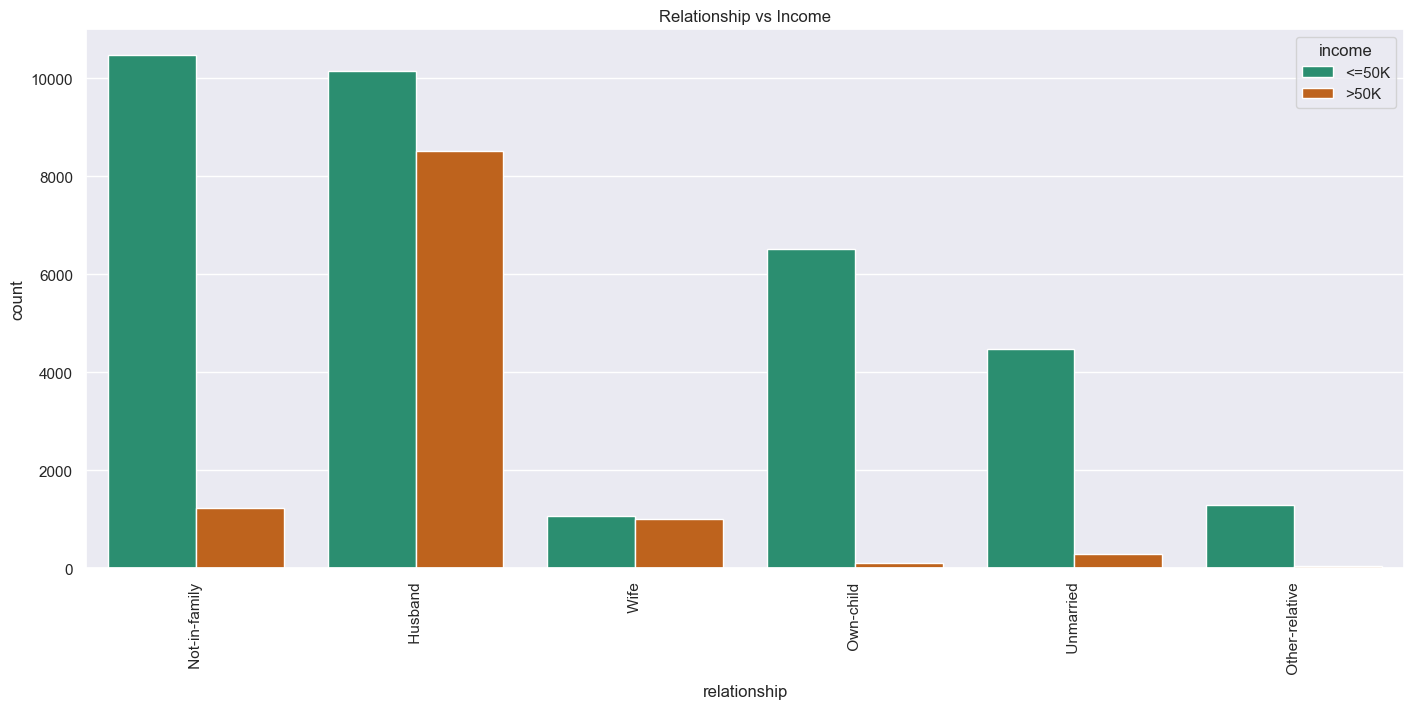

In [458]:
# Capitan-Gain Distribution
plt.figure(figsize=(17,7))
sns.countplot(x='relationship', hue='income', data=df)
plt.title('Relationship vs Income')
plt.xticks(rotation=90)
plt.show()

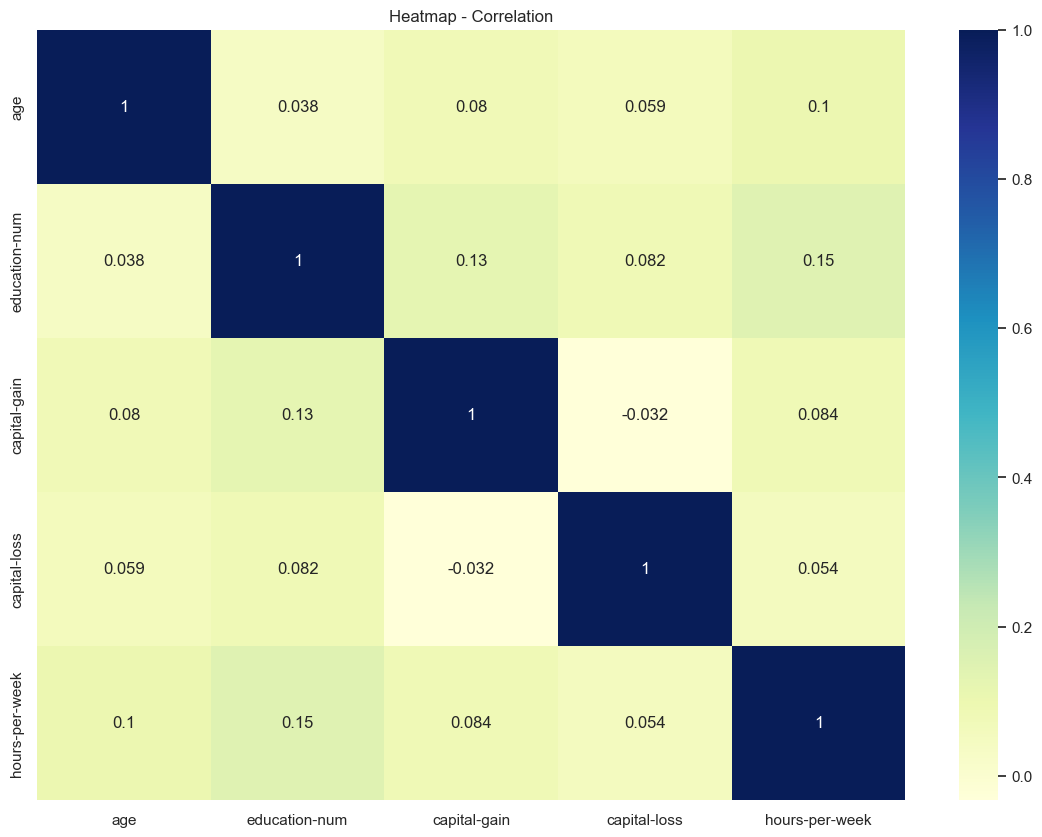

In [459]:
# Heatmap of correlation
plt.figure(figsize=(14, 10))
sns.heatmap(df.select_dtypes(include= 'number').corr(method= 'pearson'), cmap=  "YlGnBu", annot= True)
plt.title('Heatmap - Correlation')
plt.show()

## 4. Data Cleaning

### 4.1 Missing Values

In [460]:
df.isna().sum()

age                0
workclass          0
education_level    0
education-num      0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

We don't have any missing values

In [461]:
df.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


### 4.2 Outliners

In [462]:
def outliners(dataframe) :
    num_col = dataframe.select_dtypes(include = 'number').columns.to_list()
    for col in num_col :
        sns.boxplot(data= df, x= col)
        plt.show()

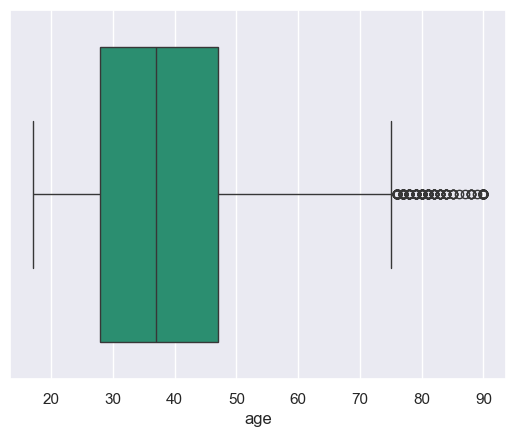

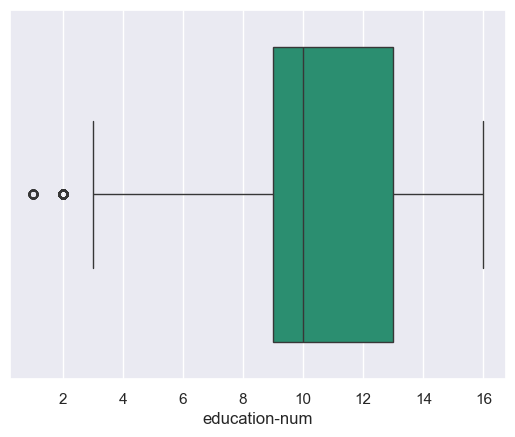

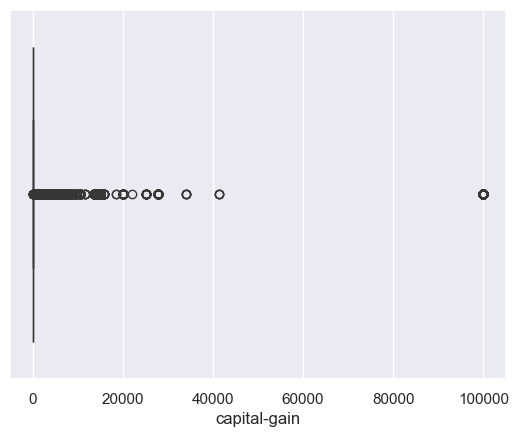

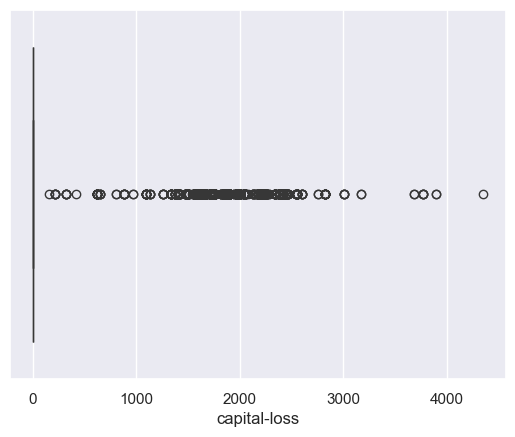

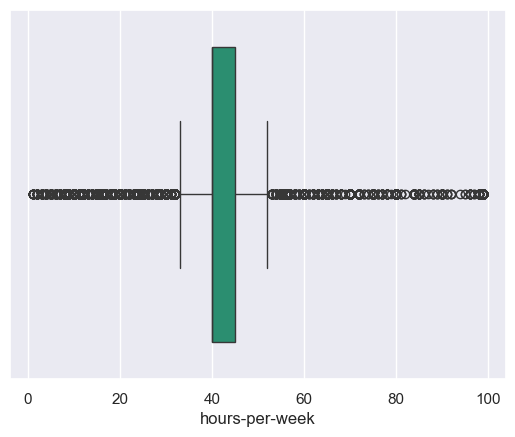

In [463]:
outliners(df)

In [464]:
def dataset_IQR(col) :
    """ Calculate IQR for given column
     
    Args:
        col -> column for IQR calculation

    Return:
        IQR value of specific column, value -> float
    
    """
    return np.quantile(col, 0.75) - np.quantile(col, 0.25)


In [465]:
def lower_tresh(col):
    """ Calculate lower treshold

    Args:
        col -> column for IQR calculation

    Return:
        lower outliner value -> float
    """ 
    return np.quantile(col, 0.25) - (1.5 * dataset_IQR(col))

In [466]:
def upper_tresh(col) :
    """ Calculate upper treshold

    Args:
        col -> column for IQR calculation

    Return:
        upper outliner value -> float
    """ 
    return np.quantile(col, 0.75) + (1.5 * dataset_IQR(col))

In [467]:
def lower_treshholders(dataframe) :
    """ Check how many outliners-lower we have for each column
    
    Args:
        dataframe -> dataframe from where we load data
    
    """
    for x in dataframe.select_dtypes(include= 'number') :
        if dataframe[x][dataframe[x] < lower_tresh(dataframe[x])].count() > 0 :
            print(f'Column: {x}')
            print(f'Lower treshold {lower_tresh(dataframe[x])}')
            print(f'Ilosc wartosci ponizej dolnego outlinera: {dataframe[x][dataframe[x] < lower_tresh(dataframe[x])].count()}\n')

In [468]:
def upper_treshholders(dataframe) :
    """ Check how many outliners-upper we have for each column
    
    Args:
        dataframe -> dataframe from where we load data
    
    """
    for x in dataframe.select_dtypes(include= 'number') :
        if dataframe[x][dataframe[x] > upper_tresh(dataframe[x])].count() > 0 :
            print(f'Column: {x}')
            print(f'Upper treshold {upper_tresh(dataframe[x])}')
            print(f'Ilosc wartosci powyzej górnego outlinera: {dataframe[x][dataframe[x] > upper_tresh(dataframe[x])].count()}\n')

In [469]:
# Lowers Treshold column outliners
lower_treshholders(df)

Column: education-num
Lower treshold 3.0
Ilosc wartosci ponizej dolnego outlinera: 294

Column: hours-per-week
Lower treshold 32.5
Ilosc wartosci ponizej dolnego outlinera: 6918



In [470]:
# Upper Treshold column outliners
upper_treshholders(df)

Column: age
Upper treshold 75.5
Ilosc wartosci powyzej górnego outlinera: 269

Column: capital-gain
Upper treshold 0.0
Ilosc wartosci powyzej górnego outlinera: 3790

Column: capital-loss
Upper treshold 0.0
Ilosc wartosci powyzej górnego outlinera: 2140

Column: hours-per-week
Upper treshold 52.5
Ilosc wartosci powyzej górnego outlinera: 4981



## 5. Feature Enginering

In [471]:
# Copy of dataframe
df_new = df.copy()

In [472]:
df.shape, df_new.shape

((45222, 14), (45222, 14))

In [473]:
# Save new dataframe to CSV
df_new.to_csv('data\census_new.csv')

In [474]:
df_new.sample(10)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32842,42,Private,Bachelors,13.0,Married-civ-spouse,Adm-clerical,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
42624,46,Federal-gov,Bachelors,13.0,Married-civ-spouse,Adm-clerical,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
31700,33,Private,Bachelors,13.0,Never-married,Prof-specialty,Not-in-family,White,Male,0.0,0.0,50.0,United-States,>50K
15420,31,Private,HS-grad,9.0,Divorced,Other-service,Not-in-family,White,Female,0.0,0.0,25.0,United-States,<=50K
35957,27,Private,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
34045,37,Private,Bachelors,13.0,Never-married,Adm-clerical,Own-child,Black,Female,0.0,0.0,32.0,United-States,<=50K
44741,57,Self-emp-not-inc,Assoc-acdm,12.0,Divorced,Prof-specialty,Unmarried,White,Male,0.0,0.0,40.0,United-States,<=50K
31416,49,Private,Some-college,10.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
23136,20,Private,Some-college,10.0,Never-married,Other-service,Own-child,White,Male,0.0,0.0,50.0,United-States,<=50K
10033,25,Private,HS-grad,9.0,Married-civ-spouse,Adm-clerical,Wife,White,Female,0.0,0.0,50.0,United-States,>50K


In [475]:
# Add profit column
df_new['profit'] = df_new['capital-gain'] - df['capital-loss']

In [476]:
df_new.sample(10)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,profit
43832,33,Private,HS-grad,9.0,Married-civ-spouse,Transport-moving,Husband,White,Male,0.0,0.0,35.0,Greece,<=50K,0.0
2916,36,Private,Prof-school,15.0,Divorced,Prof-specialty,Not-in-family,White,Male,99999.0,0.0,45.0,United-States,>50K,99999.0
34193,27,Private,Some-college,10.0,Never-married,Adm-clerical,Not-in-family,Black,Female,0.0,0.0,40.0,United-States,<=50K,0.0
10702,20,Private,Some-college,10.0,Separated,Other-service,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K,0.0
9459,37,Private,HS-grad,9.0,Married-civ-spouse,Sales,Husband,White,Male,0.0,0.0,50.0,United-States,>50K,0.0
43479,43,Private,Some-college,10.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,>50K,0.0
9267,28,Private,Some-college,10.0,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0.0,0.0,40.0,Philippines,<=50K,0.0
32106,53,Private,Some-college,10.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,50.0,United-States,>50K,0.0
35484,20,Private,HS-grad,9.0,Never-married,Craft-repair,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K,0.0
23723,28,Private,Some-college,10.0,Divorced,Other-service,Other-relative,Black,Male,0.0,0.0,24.0,United-States,<=50K,0.0


In [477]:
# Add hour per day work
df_new['hours-per-day'] = round(df_new['hours-per-week'] / 5, 1)

In [478]:
df_new.sample(10)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,profit,hours-per-day
22890,53,Local-gov,HS-grad,9.0,Married-civ-spouse,Adm-clerical,Wife,White,Female,0.0,0.0,40.0,United-States,>50K,0.0,8.0
16514,44,Self-emp-not-inc,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0.0,0.0,60.0,Taiwan,>50K,0.0,12.0
7828,36,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Female,0.0,0.0,40.0,United-States,<=50K,0.0,8.0
22821,41,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,56.0,United-States,>50K,0.0,11.2
6211,34,Self-emp-not-inc,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,80.0,United-States,<=50K,0.0,16.0
41949,42,Private,Masters,14.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,40.0,United-States,>50K,0.0,8.0
5420,60,Self-emp-not-inc,Some-college,10.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,24.0,United-States,<=50K,0.0,4.8
813,27,Private,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,70.0,United-States,<=50K,0.0,14.0
20667,32,Private,Assoc-acdm,12.0,Never-married,Adm-clerical,Not-in-family,White,Female,0.0,0.0,45.0,United-States,<=50K,0.0,9.0
42838,55,Local-gov,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,40.0,United-States,>50K,0.0,8.0


In [479]:
# Feature tool

entity = ft.EntitySet(id = 'my_data')

In [480]:
entity = entity.add_dataframe(dataframe_name ='data', dataframe = df_new, index='index')

c:\Users\magdz\anaconda3\Lib\site-packages\featuretools\entityset\entityset.py:1733: UserWarning: index index not found in dataframe, creating new integer column
  warnings.warn(
c:\Users\magdz\anaconda3\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
c:\Users\magdz\anaconda3\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
c:\Users\magdz\anaconda3\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_dat

In [481]:
df_ft, feature_defs = ft.dfs(entityset= entity, target_dataframe_name='data', max_depth= 5)

c:\Users\magdz\anaconda3\Lib\site-packages\featuretools\synthesis\deep_feature_synthesis.py:169: UserWarning: Only one dataframe in entityset, changing max_depth to 1 since deeper features cannot be created
  warnings.warn(


In [482]:
feature_defs

[<Feature: age>,
 <Feature: workclass>,
 <Feature: education_level>,
 <Feature: education-num>,
 <Feature: marital-status>,
 <Feature: occupation>,
 <Feature: relationship>,
 <Feature: race>,
 <Feature: sex>,
 <Feature: capital-gain>,
 <Feature: capital-loss>,
 <Feature: hours-per-week>,
 <Feature: native-country>,
 <Feature: income>,
 <Feature: profit>,
 <Feature: hours-per-day>]

In [483]:
df_ft.sample(20)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,profit,hours-per-day
index,,,,,,,,,,,,,,,,
28525,29,Self-emp-inc,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,55.0,United-States,>50K,0.0,11.0
8425,28,Private,Masters,14.0,Divorced,Sales,Own-child,White,Female,0.0,0.0,40.0,United-States,<=50K,0.0,8.0
37892,28,Private,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,White,Male,99999.0,0.0,40.0,United-States,>50K,99999.0,8.0
8100,27,Local-gov,Masters,14.0,Never-married,Prof-specialty,Not-in-family,White,Female,0.0,0.0,40.0,United-States,<=50K,0.0,8.0
36668,54,Local-gov,11th,7.0,Widowed,Protective-serv,Unmarried,Black,Female,0.0,0.0,40.0,United-States,<=50K,0.0,8.0
14256,45,Private,Some-college,10.0,Divorced,Exec-managerial,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K,0.0,8.0
36650,50,Private,12th,8.0,Never-married,Protective-serv,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K,0.0,8.0
20014,28,Private,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,50.0,United-States,>50K,0.0,10.0
24297,44,Private,Some-college,10.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,40.0,United-States,>50K,0.0,8.0


In [484]:
df_ft.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45222 entries, 0 to 45221
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   age              45222 non-null  int64   
 1   workclass        45222 non-null  category
 2   education_level  45222 non-null  category
 3   education-num    45222 non-null  float64 
 4   marital-status   45222 non-null  category
 5   occupation       45222 non-null  category
 6   relationship     45222 non-null  category
 7   race             45222 non-null  category
 8   sex              45222 non-null  category
 9   capital-gain     45222 non-null  float64 
 10  capital-loss     45222 non-null  float64 
 11  hours-per-week   45222 non-null  float64 
 12  native-country   45222 non-null  category
 13  income           45222 non-null  category
 14  profit           45222 non-null  float64 
 15  hours-per-day    45222 non-null  float64 
dtypes: category(9), float64(6), int64(1)
memory u